In [1]:
import geometry as geo
import numpy as np
import matplotlib.pyplot as plt
import visualization as vis
import data as dt

In [2]:
# Create Axis aligned squares
max_ = 300
min_ = 0
step = 1
x0 = np.arange(min_, max_, step)
y0 = np.arange(min_, max_, step)
# lets create a set of sizes
size0 = np.array([1, 2, 3, 4])
# lets create a set of rotations
# rotation will be from 0 to 90 degrees
mu = [10, 25, 45, 66]
sigma = [5, 10, 15, 20]
num = 1000
rotation0 = dt.rotations(mu, sigma, num)
for i in range(rotation0.__len__()):
    #rotation0[i] = np.deg2rad(rotation0[i])
    rotation0[i] = 0

In [3]:
data = dt.create_data(num, x0, y0, size0, rotation0)

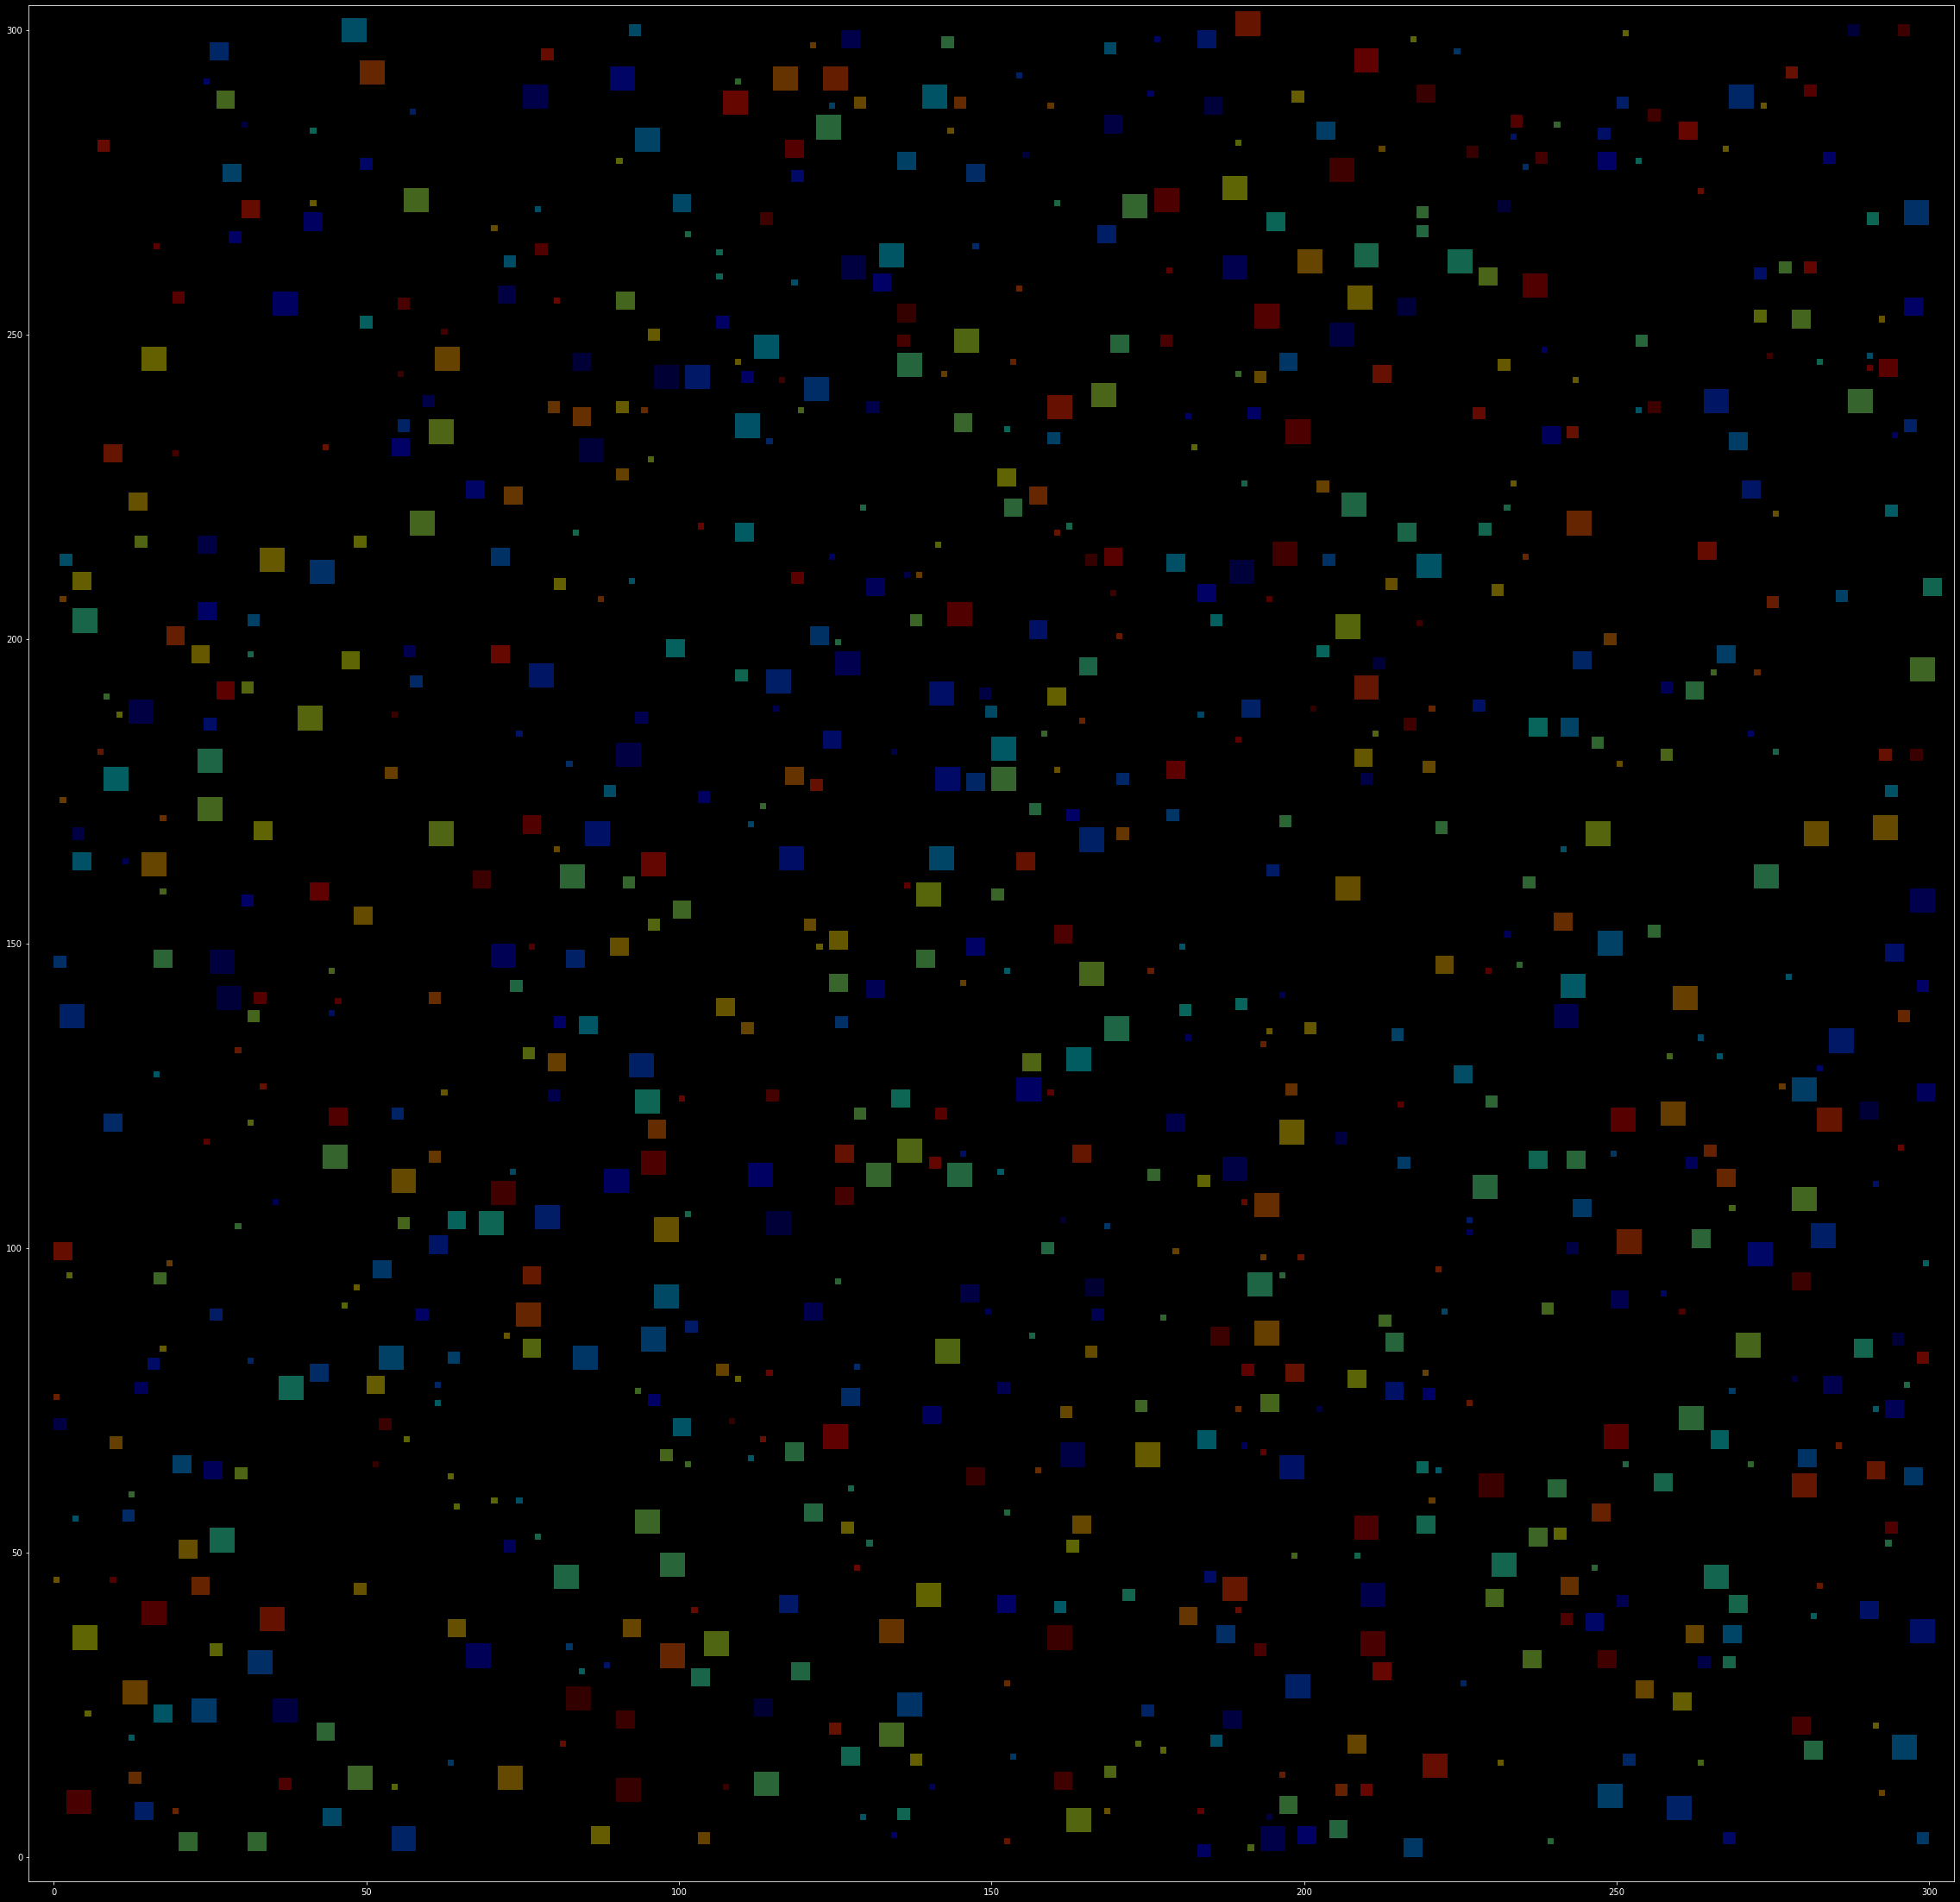

In [4]:
#vis.plot_data(data, 20, [- max_ - max(size0), max_ + max(size0), -max_ - max(size0) , max_ + max(size0)])
limits = [min_ - max(size0), max_ + max(size0), min_ - max(size0), max_ + max(size0)]
vis.plot_data(data,40,limits)

In [5]:
# find the distance of a point from a square
def distance(point, square):
    x0 = point[0]
    y0 = point[1]
    px0 = square[0]
    py0 = square[1]
    pl = square[2]
    dist = 0
    distx=0
    disty=0
    # distance for l = 0
    dx = px0 - x0
    dy = py0 - y0
    # distance for l = pl
    dxl= dx + pl
    dyl= dy + pl
    cases = [dx>0,dx<0,dy>0,dy<0,dxl>0,dxl<0,dyl>0,dyl<0]
    # check x axis first
    if dxl < 0:
        distx = abs(dxl)
    elif dx > 0:
        distx = abs(dx)
    else:
        distx = 0

    # check y axis
    if dyl < 0:
        disty = abs(dyl)
    elif dy > 0:
        disty = abs(dy)
    else:
        disty = 0
    
    dist = np.sqrt(distx**2 + disty**2)
    return dist


In [6]:
def bf_nn(data, point):
    min_dist = 100000
    min_index = 0
    for i in range(data.__len__()):
        dist = distance(point, data[i])
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return min_index, min_dist

In [7]:
def create_points(num, x0, y0):
    points = []
    for i in range(num):
        x = np.random.choice(x0)
        y = np.random.choice(y0)
        points.append([x, y])
    return points

In [ ]:
# print for a query of points
# create a list of points randomly
num = 1
x0 = np.arange(min_, max_, step)
y0 = np.arange(min_, max_, step)
points = create_points(num, x0, y0)
#print(points)

In [ ]:
import time 
t1 = time.time()
bf_nn(data,[110,150])
t2 = time.time()
# print the time taken in milliseconds
print((t2-t1)*1000)

## Time for Brute Force of 1 point and 1000 squares is 3.47 ms

In [ ]:

# for 100 points and 1000 data points
for i in range(points.__len__()):
    index, dist = bf_nn(data, points[i])
    #print("Point: ", points[i], "Nearest Neighbor: ", data[index], "Distance: ", dist)

In [8]:
# we are gonna create an Rtree with the data as bounding boxes of ids and the data
from rtree import index
idx = index.Index()

In [9]:
def arrange_data(data):
    tup = []
    for i in range(data.__len__()):
        tup.append((data[i][0], data[i][1], data[i][0]+data[i][2], data[i][1]+data[i][2]))
    
    return tup

In [10]:
data_new = arrange_data(data)

In [11]:
for i in range(data.__len__()):
    # create tuple
    tup = (data_new[i][0], data_new[i][1], data_new[i][2], data_new[i][3])
    idx.insert(i, tup)

In [28]:
def create_square_from_midpoint(x0, y0, l):
    # create a square from the midpoint
    # x0, y0 are the midpoints
    # l is the length of the square
    # return the coordinates of the square
    # x0, y0 are the midpoints
    # l is the length of the square
    # return the coordinates of the square
    x1 = x0 - l / 2
    y1 = y0 - l / 2
    x2 = x0 + l / 2
    y2 = y0 + l / 2
    return x1, y1, x2, y2

In [98]:
def NNRTREE(idx, point):
    result = list(idx.nearest((point[0], point[1],point[0], point[1]), 1))
    dist = distance(point, data[result[0]])
    return result, dist

 

In [99]:
point = [110, 150]

In [102]:
res = list(idx.nearest((point[0], point[1],point[0], point[1]), 1))

In [109]:
%%timeit
NNRTREE(idx, point)

133 µs ± 3.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [112]:
%%timeit
bf_nn(data, point)

3.77 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Difference in time is 3.77 ms / 133 μs = 28.35

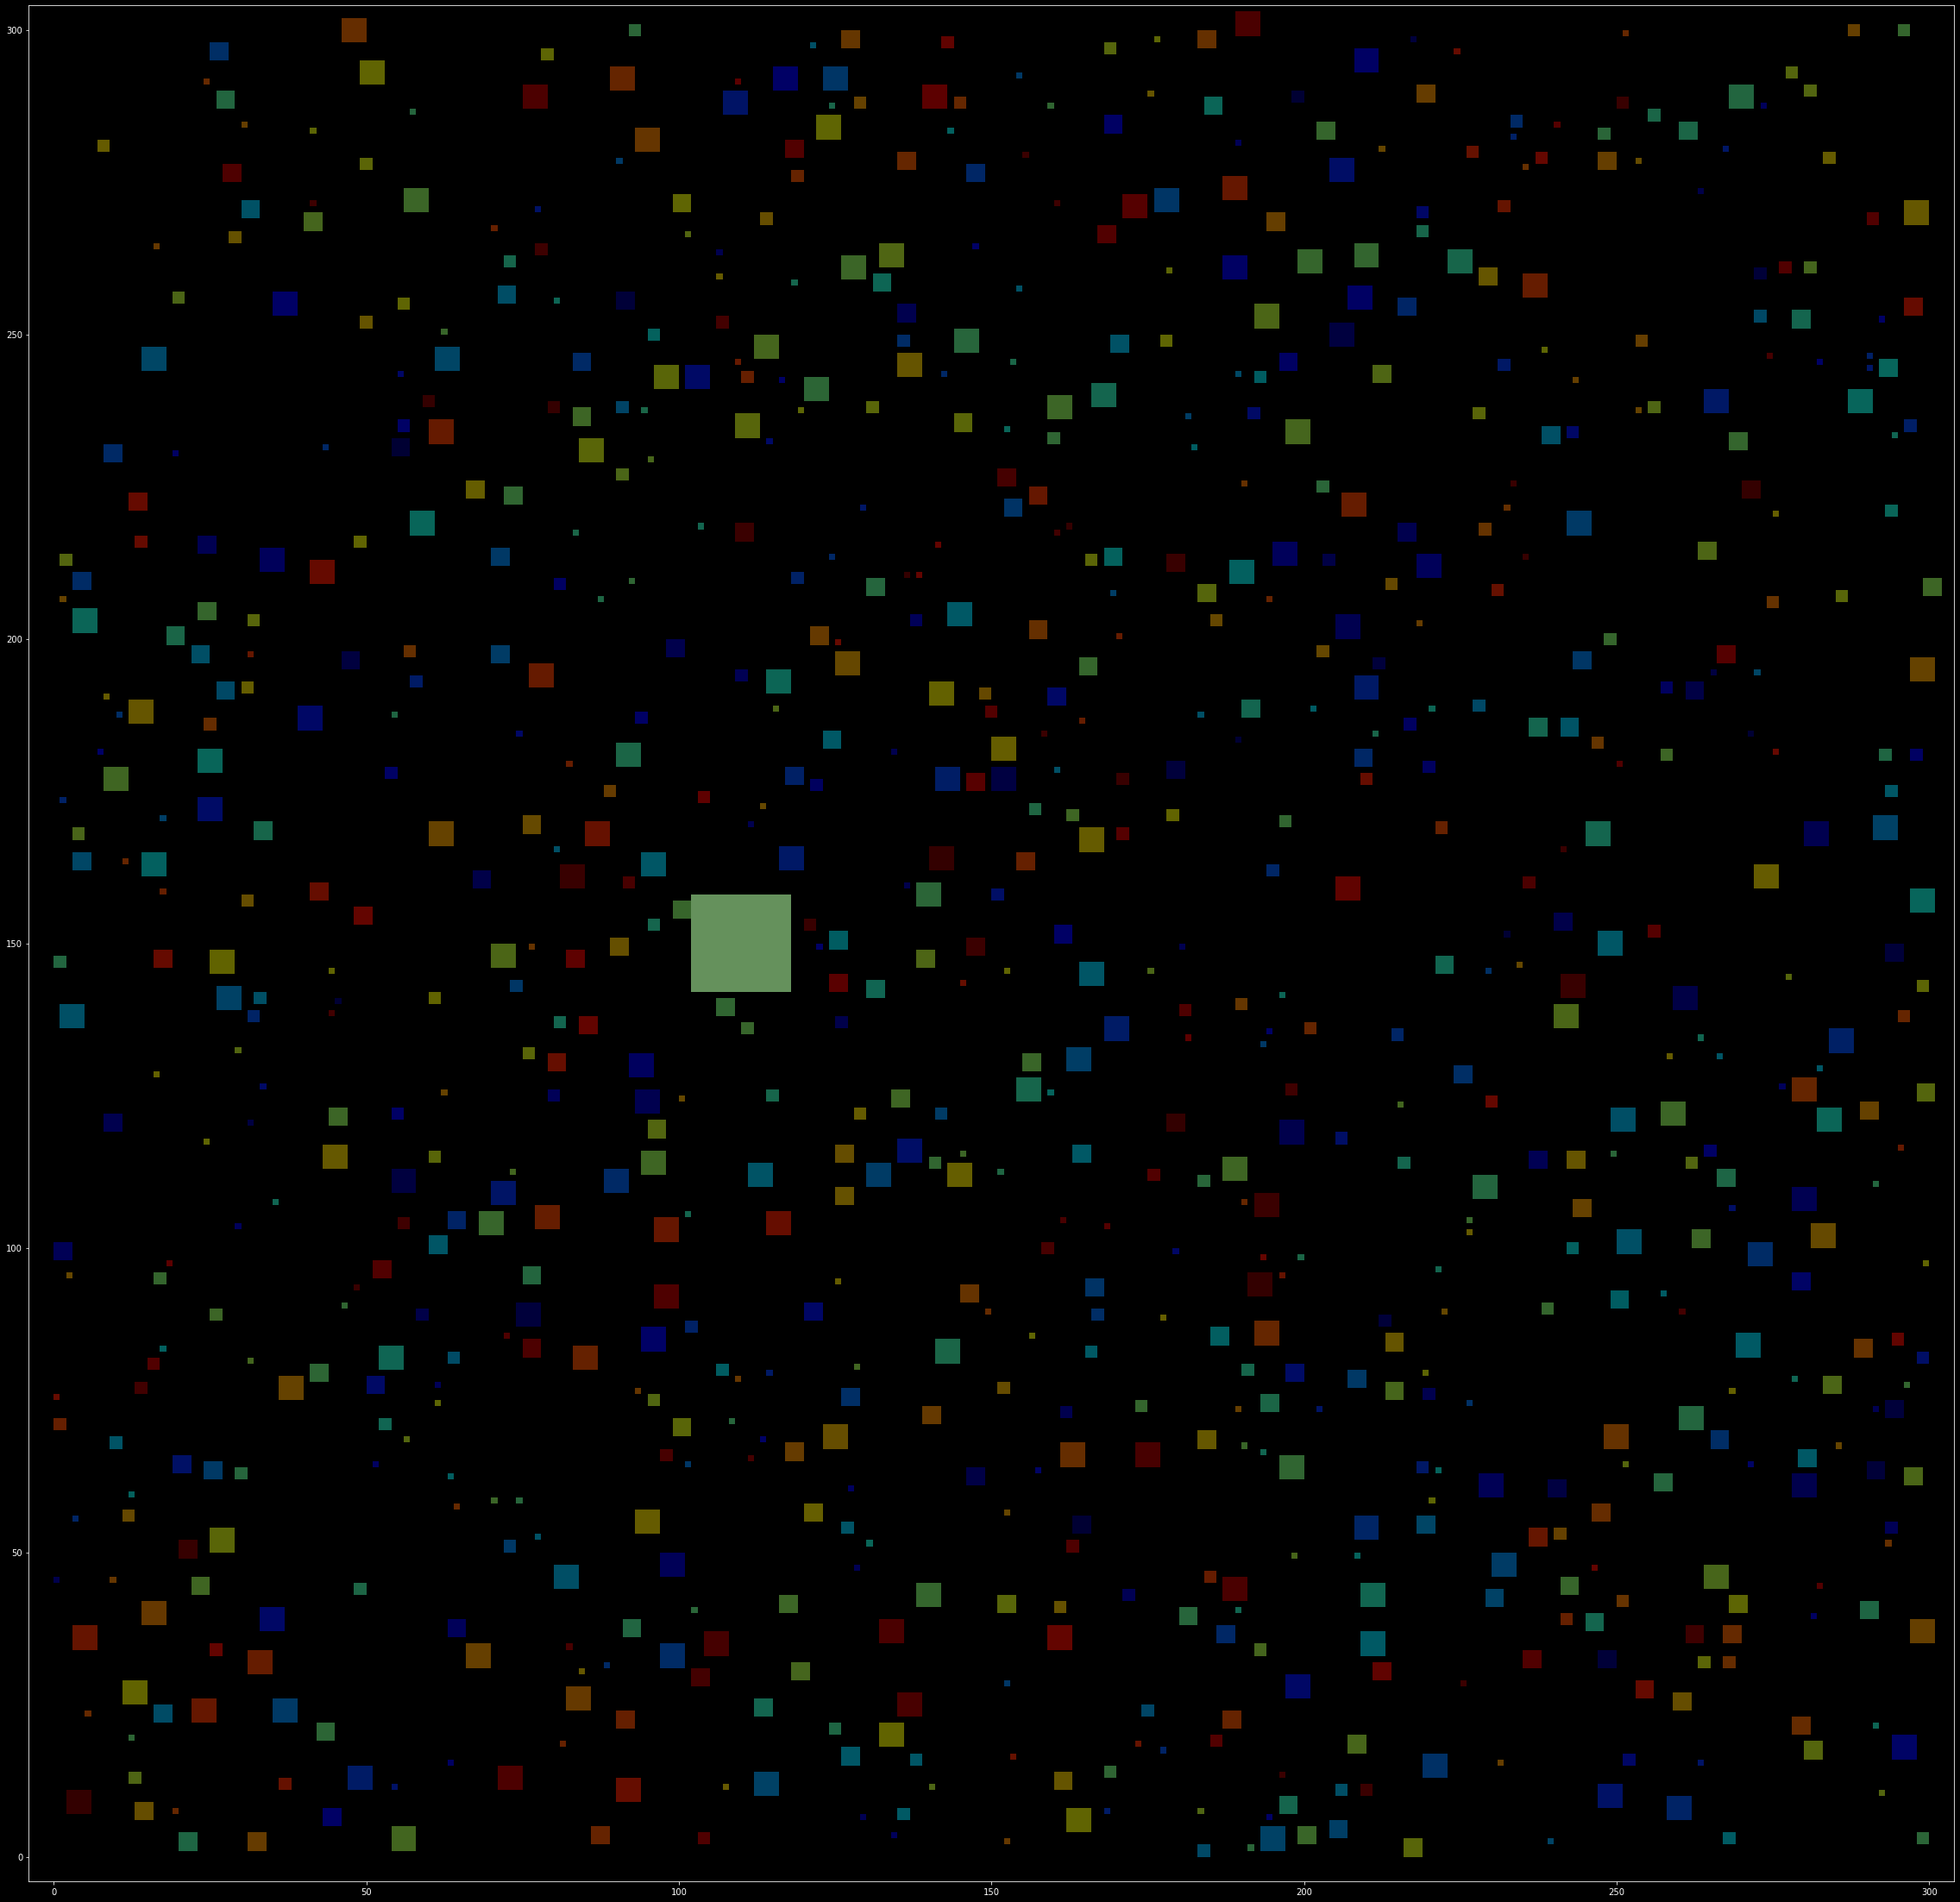

In [114]:
# plot the data and the boundix box of the nearest neighbor 
bbox_data = np.array([bbox[0], bbox[1], bbox[2]-bbox[0], 0])
data4 = data
data4.append(bbox_data)
limits = [min_ - max(size0), max_ + max(size0), min_ - max(size0), max_ + max(size0)]
vis.plot_data(data4,40,limits)